# Dataset overview

This notebook contains the SPARQL queries useful to have a general overview of the dataset itself (e.g. number of triples, number of subjects etc.). </br>
It is structured ad follows. Section 1 gives an overview of the numbers of objects present in the dataset. Section 2 gives an overview on cultural phenomena and the exploratory analisis of the correlation between cultural phenomena and subjects of other levels. Section 3 presents the relations between subjects of different levels. 

In [1]:
import rdflib
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
from rdflib import Namespace
from rdflib import URIRef


In [50]:
import pandas as pd
import numpy as np
import seaborn as seaborn 
from collections import defaultdict , Counter

In [24]:
newg = rdflib.Graph() # we create a new graph
newg.parse("07112022output3.ttl", format="ttl")

<Graph identifier=Na3cbff5971964d6397b52fade16e55f1 (<class 'rdflib.graph.Graph'>)>

In [126]:
# useful functions
import json
def store_in_json(file_name, dictName): 
  with open(file_name, mode='w', encoding="utf-8") as jsonfile:
    json.dump(dictName, jsonfile)
    
# open dictionaries stored in json
def open_json(json_file): 
  with open(json_file, mode='r', encoding="utf-8") as jsonfile:
    dictName = json.load(jsonfile)
    return dictName


import csv 
def store_csv(file_name, first_line, list_of_lists): 
    with open(file_name, mode='w', newline='', encoding='UTF-8') as my_file:
        file = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
        file.writerow(first_line) 
        for l in list_of_lists: 
            file.writerow(l) 
    return(file_name)

# 1.The dataset in numbers

In [31]:
counting_overview = []

### Number of triples

In [32]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(?subj) as ?tot) WHERE {
?subj ?rel ?obj. 

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Triples", int(row[0])])

(rdflib.term.Literal('71318', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of artworks

In [34]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?art) as ?tot) WHERE {
#?obj a crm:E22_Human_Made_Object; 
#    crm:P65_shows_visual_item ?art. 
?art a icon:Artwork. 
?rec icon:aboutWorkOfArt ?art.  

}
'''

cqres = newg.query(cq)

for row in cqres:
    counting_overview.append(["Artworks", int(row[0])])
    print(row)

(rdflib.term.Literal('423', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of level 1 recognitions

In [35]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?preic) as ?tot) WHERE {
{?preic a icon:PreiconographicalRecognition} UNION {?preic a icon:FormalMotifRecognition} 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 1 Recognitions", int(row[0])])

(rdflib.term.Literal('3517', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [ ]:
### Number of level 2 recognitions

In [36]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?icrec) as ?tot) WHERE {
?icrec a icon:IconographicalRecognition. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    counting_overview.append(["Level 2 Recognitions", int(row[0])])
    print(row)

(rdflib.term.Literal('1035', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [ ]:
### Number of level 3 recognitions

In [37]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?rec) as ?tot) WHERE {
?rec a icon:IconologicalRecognition. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 3 Recognitions", int(row[0])])

(rdflib.term.Literal('877', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of level 1 subjects

In [63]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?lev1) as ?tot) WHERE {
?rec a icon:PreiconographicalRecognition. 
{?rec icon:recognizedArtisticMotif ?am} UNION {?rec icon:recognizedComposition ?comp. ?comp icon:hasPart ?am}
?am icon:hasFactualMeaning | icon:hasExpressionalMeaning | crm:P138_represents ?lev1. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 1 subjects", int(row[0])])

(rdflib.term.Literal('923', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of level 2 subjects

In [39]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>


SELECT (count(distinct ?lev2) as ?tot) WHERE {
VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasPlace icon:hasPersonification icon:hasNamedObject icon:hasSymbol}
?rec a icon:IconographicalRecognition. 
{?rec icon:recognizedImage ?img. ?img ?rel ?lev2} UNION {?rec icon:recognizedInvenzione ?inv. ?inv icon:composedOf ?lev2}

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 2 subjects", int(row[0])])
counting_overview

(rdflib.term.Literal('555', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


[['Triples', 71318],
 ['Artworks', 423],
 ['Level 1 Recognitions', 3517],
 ['Level 2 Recognitions', 1035],
 ['Level 3 Recognitions', 877],
 ['Level 1 subjects', 888],
 ['Level 2 subjects', 555]]

### Number of level 3 subjects

In [40]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>


SELECT (count(distinct ?lev3) as ?tot) WHERE {
VALUES ?rel {icon:recognizedConceptualObject icon:recognizedCulturalPhenomenon}
?rec a icon:IconologicalRecognition. 
?rec icon:recognizedIntrinsicMeaning ?intrinsic. ?intrinsic ?rel ?lev3. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 3 subjects", int(row[0])])

(rdflib.term.Literal('422', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of people

In [41]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?people) as ?tot) WHERE {

?people a crm:E21_Person. 

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["People", int(row[0])])

(rdflib.term.Literal('214', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [11]:
if (URIRef("http://icondataset.org/people/cesare-vecellio"), None, None) in newg:
    print("this works")
else: 
    print("not working")

not working


### Number of books

In [42]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?book) as ?tot) WHERE {

{?book crm:P2_has_type ?type. 
?type crm:P2_has_type <http://vocab.getty.edu/page/aat/300028051>. } 
UNION 
{?book crm:P2_has_type <http://vocab.getty.edu/page/aat/300028051>}

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Books", int(row[0])])

(rdflib.term.Literal('147', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of Places

In [43]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?place) as ?tot) WHERE {
#?art crm:P53_has_former_or_current_location ?place.
# ?place crm:P89_falls_within ?place2. 
?place a crm:E53_Place.

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Places", int(row[0])])

(rdflib.term.Literal('221', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### number of artworks types

In [44]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?type) as ?tot) WHERE {
?obj crm:P65_shows_visual_item ?art; 
    crm:P2_has_type ?type. 


}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Cultural Object types", int(row[0])])

(rdflib.term.Literal('56', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of styles

In [45]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?style) as ?tot) WHERE {

?style crm:P2_has_type <http://vocab.getty.edu/aat/300015646>.



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Styles", int(row[0])])

(rdflib.term.Literal('32', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of periods

In [46]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?period) as ?tot) WHERE {

?period a crm:E4_Period.



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Periods", int(row[0])])

(rdflib.term.Literal('12', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of sources cited as evidence

In [47]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?evidence) as ?tot) WHERE {

?entity cito:citesAsEvidence ?evidence. 



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["cited Evidences", int(row[0])])

(rdflib.term.Literal('186', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of resources aligned

In [48]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX owl: <http://www.w3.org/2002/07/owl#> 


SELECT (count(distinct ?entity) as ?tot) WHERE {

?entity owl:sameAs ?evidence. 



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["resources aligned", int(row[0])])

(rdflib.term.Literal('195', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [64]:
# we don't consider triples, as the visualization is not interesting with a such high number 
counting_overview.remove(["Level 1 subjects", 888])
counting_overview

[['Artworks', 423],
 ['Level 1 Recognitions', 3517],
 ['Level 2 Recognitions', 1035],
 ['Level 3 Recognitions', 877],
 ['Level 2 subjects', 555],
 ['Level 3 subjects', 422],
 ['People', 214],
 ['Books', 147],
 ['Places', 221],
 ['Cultural Object types', 56],
 ['Styles', 32],
 ['Periods', 12],
 ['cited Evidences', 186],
 ['resources aligned', 195],
 ['Level 1 subjects', 923]]

In [65]:
# barchart of the countings, excluding the number of triples ? 

# List of lists where each list is [object, frequency] 

df = pd.DataFrame(np.array(counting_overview),
                   columns=['Object', 'Frequency'])
df['Frequency'] = df['Frequency'].astype(int)
result = df.dtypes

print("Output:")
print(result)


Output:
Object       object
Frequency     int32
dtype: object


In [66]:
dfcount = df.sort_values(by=['Frequency'], ascending=False)
dfcount

Object  Frequency
1    Level 1 Recognitions       3517
2    Level 2 Recognitions       1035
14       Level 1 subjects        923
3    Level 3 Recognitions        877
4        Level 2 subjects        555
0                Artworks        423
5        Level 3 subjects        422
8                  Places        221
6                  People        214
13      resources aligned        195
12        cited Evidences        186
7                   Books        147
9   Cultural Object types         56
10                 Styles         32
11                Periods         12

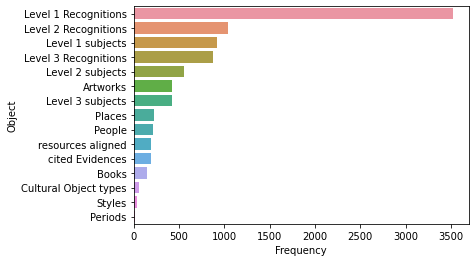

In [67]:
import seaborn as seaborn 
chartCount = seaborn.barplot(data=dfcount, x = 'Frequency', y='Object')

# General overwiew of Cultural Phenomena

section with: 
* overview of the major categories counting 
* barcharts showing the frequency of the top subjects per cf (one barchart per cf category) 
* general histogram, fixed
* co-occurrencies of subjects

## Overview of the major categories counting
count how many artworks have a certain phenomenon category and visualize it. NB: one cultural phenomenon may have more than one category

In [69]:
cf_category_frequency = []
cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFBroaderLabel (count(distinct ?artwork) as ?tot) WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic icon:recognizedCulturalPhenomenon ?meaning.
  ?meaning a icon:CulturalPhenomenon; crm:P2_has_type ?CFBroader. 
  ?CFBroader rdfs:label ?CFBroaderLabel .
}
GROUP BY ?CFBroaderLabel 
ORDER BY DESC(?tot)
'''

cq1res = newg.query(cq1)
for row in cq1res: 
    if str(row[0]) != "?": 
        cf_category_frequency.append([str(row[0]), int(row[1])])
    

In [70]:
df2 = pd.DataFrame(np.array(cf_category_frequency),
                   columns=['Cultural Phenomenon', 'Frequency'])
df2['Frequency'] = df2['Frequency'].astype(int)
result = df2.dtypes

print("Output:")
print(result)


Output:
Cultural Phenomenon    object
Frequency               int32
dtype: object


In [71]:
# df3 = df2.sort_values(by=['Frequency'], ascending=False)
df3 = df2.sort_index(ascending=False)
df3

Cultural Phenomenon  Frequency
20           Cultural interpretation          2
19                     Moral meaning          2
18       Iconographic interpretation          3
17                             Taste          3
16                            Humour          3
15                 Cultural movement          4
14                    Cultural value          7
13               Societal phenomenon         10
12                Cultural influence         14
11                          Attitude         15
10          Iconographical influence         15
9                Artist's expression         15
8          Cultural reinterpretation         17
7      Formal or stylistic influence         24
6                             Belief         30
5                           Tendency         39
4      Iconographical interpretation         51
3     Formal or stylistic phenomenon         61
2      Formal or stylistic evolution         89
1           Iconographical evolution        115
0   Reception of Classical antiquity        203

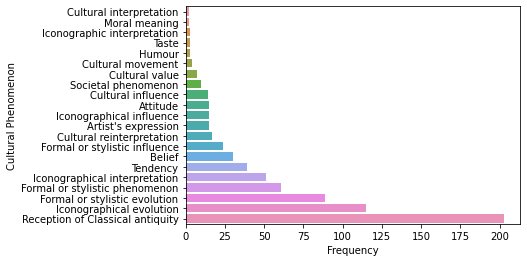

In [72]:
import seaborn as seaborn 
chart = seaborn.barplot(data=df3, x = 'Frequency', y='Cultural Phenomenon')

## Frequency of the top K subjects per Cultural Phenomenon

In [81]:
# test
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?artwork WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .


} 
""" 

cq2res = newg.query(cq2)
for row in cq2res:
  print(row[0], '-',row[1])

In [82]:
# no modify
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?subj2  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition;
          icon:recognizedImage ?image.
 
  ?CFbroader rdfs:label ?CFbroaderLabel. 
  ?image ?rel ?subj2. 

  #OPTIONAL {
  #  ?icrec icon:aboutWorkOfArt ?artwork;
  #  a icon:IconographicalRecognition; icon:recognizedInvenzione ?subj2.
  #}

} 
""" 

cq2res = newg.query(cq2)
for row in cq2res:
  print(row[0], '-',row[3], " -- cf: ", row[1])

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/venus  -- cf:  Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/jupiter  -- cf:  Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/hercules  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-evolution - http://icondataset.org/orpheus  -- cf:  Iconographical evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/orpheus  -- cf:  Reception of Classical antiquity
http://icondataset.org/societal-phenomenon - http://icondataset.org/the-young-mago-caspar  -- cf:  Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/member-of-the-procession  -- cf:  Societal phenomenon
http://icondataset.org/iconographical-evolution - http://icondataset.org/christ  -- cf:  Iconographical evolution
http://

http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/the-three-graces  -- cf:  Formal or stylistic evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-three-graces  -- cf:  Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/europas-companions  -- cf:  Reception of Classical antiquity
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/europas-companions  -- cf:  Formal or stylistic evolution
http://icondataset.org/attitude - http://icondataset.org/europas-companions  -- cf:  Attitude
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/eve  -- cf:  Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/people/saint-luke  -- cf:  Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/saint

http://icondataset.org/humour - http://icondataset.org/silenus  -- cf:  Humour
http://icondataset.org/belief - http://icondataset.org/silenus  -- cf:  Belief
http://icondataset.org/tendency - http://icondataset.org/silenus  -- cf:  Tendency
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/silenus  -- cf:  Formal or stylistic evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/silenus  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-evolution - http://icondataset.org/silenus  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - http://icondataset.org/silenus  -- cf:  Iconographical interpretation
http://icondataset.org/artists-expression - http://icondataset.org/silenus  -- cf:  Artist's expression
http://icondataset.org/humour - http://icondataset.org/satyr  -- cf:  Humour
http://icondataset.org/belief - http://icondataset.org/satyr  -- cf:  Belief
http:

http://icondataset.org/iconographical-evolution - http://icondataset.org/saturn  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/saturn  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-evolution - http://icondataset.org/saturn  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - http://icondataset.org/jupiter  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/jupiter  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-evolution - http://icondataset.org/jupiter  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn  -- cf:  Iconographical interpretation
http://icondataset.org/

http://icondataset.org/tendency - http://icondataset.org/votary-of-saturn  -- cf:  Tendency
http://icondataset.org/tendency - http://icondataset.org/giuliano-de-medici  -- cf:  Tendency
http://icondataset.org/tendency - http://icondataset.org/votary-of-jupiter  -- cf:  Tendency
http://icondataset.org/artists-expression - http://icondataset.org/jupiter-as-an-eagle  -- cf:  Artist's expression
http://icondataset.org/belief - http://icondataset.org/jupiter-as-an-eagle  -- cf:  Belief
http://icondataset.org/iconographical-interpretation - http://icondataset.org/jupiter-as-an-eagle  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/jupiter-as-an-eagle  -- cf:  Reception of Classical antiquity
http://icondataset.org/artists-expression - http://icondataset.org/ganymede  -- cf:  Artist's expression
http://icondataset.org/belief - http://icondataset.org/ganymede  -- cf:  Belief
http://icondataset.org/iconographical-interpretat

http://icondataset.org/iconographical-evolution - http://icondataset.org/apollo-medicus-or-aesculapius  -- cf:  Iconographical evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/apollo-medicus-or-aesculapius  -- cf:  Reception of Classical antiquity
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/apollo-medicus-or-aesculapius  -- cf:  Formal or stylistic phenomenon
http://icondataset.org/iconographical-influence - http://icondataset.org/apollo-medicus-or-aesculapius  -- cf:  Iconographical influence
http://icondataset.org/iconographical-evolution - http://icondataset.org/apollo-god-of-sun  -- cf:  Iconographical evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/apollo-god-of-sun  -- cf:  Reception of Classical antiquity
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/apollo-god-of-sun  -- cf:  Formal or stylistic phenomenon
http://icondataset.or

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/simeon-witnesses-the-presentation-of-christ  -- cf:  Reception of Classical antiquity
http://icondataset.org/tendency - http://icondataset.org/simeon-witnesses-the-presentation-of-christ  -- cf:  Tendency
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/simeon-witnesses-the-presentation-of-christ  -- cf:  Formal or stylistic phenomenon
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/god-creating-the-universe  -- cf:  Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/prometheus-animates-man  -- cf:  Reception of Classical antiquity
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/pygmalion-dressing-his-statue  -- cf:  Formal or stylistic evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/pygmalion-dressing-his-stat

http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/apparition-of-christ  -- cf:  Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/christ-resurrects-the-son-of-nain  -- cf:  Formal or stylistic phenomenon
http://icondataset.org/belief - http://icondataset.org/erection-of-primitive-buildings  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/erection-of-primitive-buildings  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/erection-of-primitive-buildings  -- cf:  Belief
http://icondataset.org/iconographical-interpretation - http://icondataset.org/the-age-of-stone  -- cf:  Iconographical interpretation
http://icondataset.org/artists-expression - http://icondataset.org/the-age-of-stone  -- cf:  Artist's expression
http://icondataset.org/belief - http://icondataset.org/the-age-of-stone  -- cf:  Belief
http://icondataset.org/tendency - http://icondataset.org/the-ag

http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/presbyter-bruno-mourned-by-beggars-whom-he-had-supported-during-his-life  -- cf:  Formal or stylistic evolution
http://icondataset.org/tendency - http://icondataset.org/gesture-of-saturnian-silence  -- cf:  Tendency
http://icondataset.org/cultural-influence - http://icondataset.org/resurrection-of-christ  -- cf:  Cultural influence
http://icondataset.org/iconographical-evolution - http://icondataset.org/resurrection-of-christ  -- cf:  Iconographical evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/resurrection-of-christ  -- cf:  Reception of Classical antiquity
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/the-abduction-of-europa  -- cf:  Formal or stylistic evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-abduction-of-europa  -- cf:  Reception of Classical antiquity
http://icondataset.org/t

http://icondataset.org/iconographical-evolution - http://icondataset.org/love-stricken-soul  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - http://icondataset.org/love-stricken-soul  -- cf:  Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/sella-gestatoria  -- cf:  Iconographical interpretation
http://icondataset.org/belief - http://icondataset.org/sella-gestatoria  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/dream-vision  -- cf:  Belief
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/caduceus  -- cf:  Formal or stylistic evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/caduceus  -- cf:  Reception of Classical antiquity
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/caduceus  -- cf:  Formal or stylistic evolution
http://icondataset.org/reception-of-classical-an

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/sleep  -- cf:  Reception of Classical antiquity
http://icondataset.org/cultural-reinterpretation - http://icondataset.org/sleep  -- cf:  Cultural reinterpretation
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/death  -- cf:  Formal or stylistic evolution
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/death  -- cf:  Reception of Classical antiquity
http://icondataset.org/cultural-reinterpretation - http://icondataset.org/death  -- cf:  Cultural reinterpretation
http://icondataset.org/iconographical-influence - http://icondataset.org/the-twins-constellation  -- cf:  Iconographical influence
http://icondataset.org/cultural-influence - http://icondataset.org/the-twins-constellation  -- cf:  Cultural influence
http://icondataset.org/iconographical-evolution - http://icondataset.org/nude-prudence  -- cf:  Iconographical evolution
http://icondataset

http://icondataset.org/iconographical-interpretation - http://icondataset.org/truth  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/truth  -- cf:  Reception of Classical antiquity
http://icondataset.org/cultural-influence - http://icondataset.org/truth  -- cf:  Cultural influence
http://icondataset.org/iconographical-evolution - http://icondataset.org/truth  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - http://icondataset.org/jealousy  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/jealousy  -- cf:  Reception of Classical antiquity
http://icondataset.org/cultural-influence - http://icondataset.org/jealousy  -- cf:  Cultural influence
http://icondataset.org/iconographical-evolution - http://icondataset.org/jealousy  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - h

http://icondataset.org/belief - http://icondataset.org/two-out-of-the-four-times-of-day  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/day  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/night  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/two-out-of-the-four-rivers-of-hades  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/personification-of-the-natural-forces-stimulating-the-action-of-the-unconscious-creatures  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/seven-capital-sins  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/human-mind  -- cf:  Belief
http://icondataset.org/belief - http://icondataset.org/virtue  -- cf:  Belief
http://icondataset.org/artists-expression - http://icondataset.org/victory  -- cf:  Artist's expression
http://icondataset.org/iconographical-evolution - http://icondataset.org/three-stages-of-human-life  -- cf:  Iconographica

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/ixion-lewdness  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-interpretation - http://icondataset.org/ixion-lewdness  -- cf:  Iconographical interpretation
http://icondataset.org/moral-meaning - http://icondataset.org/ixion-lewdness  -- cf:  Moral meaning
http://icondataset.org/tendency - http://icondataset.org/ixion-lewdness  -- cf:  Tendency
http://icondataset.org/iconographical-interpretation - http://icondataset.org/hercules-egypt  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/hercules-egypt  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-interpretation - http://icondataset.org/satyr-egyptian-desert-wilderness  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/satyr-egyptian-desert-wilderness  -- cf

http://icondataset.org/belief - http://icondataset.org/mercury-discursive-reason  -- cf:  Belief
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/mercury-discursive-reason  -- cf:  Reception of Classical antiquity
http://icondataset.org/belief - http://icondataset.org/mercury-discursive-reason:-limitations-and-possibilities-of-what-human-reason-can-do  -- cf:  Belief
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/mercury-discursive-reason:-limitations-and-possibilities-of-what-human-reason-can-do  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-interpretation - http://icondataset.org/lyre-fashioned-from-a-stags-head-low-class-and-uncouth-music  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/lyre-fashioned-from-a-stags-head-low-class-and-uncouth-music  -- cf:  Reception of Classical antiquity
http://icondataset.org/tende

http://icondataset.org/iconographical-evolution - http://icondataset.org/branches-of-a-tree-antidotes-against-sexual-passion-marriage-prayer-business-abstinence  -- cf:  Iconographical evolution
http://icondataset.org/iconographical-interpretation - http://icondataset.org/branches-of-a-tree-antidotes-against-sexual-passion-marriage-prayer-business-abstinence  -- cf:  Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/blind-fortune-blindfolding-cupid-and-putting-him-on-a-sphere-affection-changes-with-luck  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/blind-fortune-blindfolding-cupid-and-putting-him-on-a-sphere-affection-changes-with-luck  -- cf:  Reception of Classical antiquity
http://icondataset.org/iconographical-evolution - http://icondataset.org/blind-fortune-blindfolding-cupid-and-putting-him-on-a-sphere-affection-changes-with-luck  -- cf:  Iconographi

http://icondataset.org/artists-expression - http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius  -- cf:  Artist's expression
http://icondataset.org/iconographical-interpretation - http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius  -- cf:  Reception of Classical antiquity
http://icondataset.org/artists-expression - http://icondataset.org/phaeton-the-presumptuous  -- cf:  Artist's expression
http://icondataset.org/iconographical-interpretation - http://icondataset.org/phaeton-the-presumptuous  -- cf:  Iconographical interpretation
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/phaeton-the-presumptuous  -- cf:  Reception of Classical antiquity
http://icondataset.org/artists-expression - http://icondataset.org/fall-of-phaeton-fate-of-every-temerarius  -- cf:  Artist's expr

In [86]:
from collections import defaultdict , Counter

meanings_subjects = defaultdict(list)
# ?meaning ?artwork ?subj2
for row in cq2res:
  meanings_subjects[str(row['CFbroader'])].append(str(row['subj2']))


meanings_subjects_with_counts = {}
for k,v in meanings_subjects.items():
#  for m,c in well_represented_phenomena_and_counts:
 #   if k == m:
    meanings_subjects_with_counts[k] = dict(Counter(v).most_common())

# add count

#meanings_subjects_with_counts
meanings_subjects_with_counts

{'http://icondataset.org/reception-of-classical-antiquity': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/jupiter': 8,
  'http://icondataset.org/apollo': 8,
  'http://icondataset.org/companion-of-serapis': 7,
  'http://icondataset.org/the-constellation-hercules': 6,
  'http://icondataset.org/blindfold-cupid': 5,
  'http://icondataset.org/saturn-devouring-a-living-child': 5,
  'http://icondataset.org/caduceus': 5,
  'http://icondataset.org/pluto': 4,
  'http://icondataset.org/bacchus': 4,
  'http://icondataset.org/the-three-graces': 4,
  'http://icondataset.org/mary': 4,
  'http://icondataset.org/satyr': 4,
  'http://icondataset.org/people/virgil': 4,
  'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/death': 4,
  'http://icondataset.org/hercules': 3,
  'http://icondataset.org/christ': 3,
  'http://icondataset.org/mars': 3,
  'http://

In [89]:
# tpo 5 most frequent subjects per cf
# maybe repeat the analysis with subject 2 broader categories? 
top_5_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    if item[0] not in top_5_subj_per_cf:
        top_5_subj_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_subj_per_cf[item[0]]) < 5:
                top_5_subj_per_cf[item[0]][pair[0]] = pair[1]
               
top_5_subj_per_cf   

{'http://icondataset.org/reception-of-classical-antiquity': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/jupiter': 8},
 'http://icondataset.org/iconographical-evolution': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/companion-of-serapis': 8,
  'http://icondataset.org/venus': 6,
  'http://icondataset.org/apollo': 6},
 'http://icondataset.org/societal-phenomenon': {'http://icondataset.org/companion-of-serapis': 3,
  'http://icondataset.org/apollo': 3,
  'http://icondataset.org/the-young-mago-caspar': 1,
  'http://icondataset.org/member-of-the-procession': 1,
  'http://icondataset.org/christ': 1},
 'http://icondataset.org/tendency': {'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/mary': 3,
  'http://icondataset.org/satyr': 3,
  'http://icondataset.org/centaur': 3,
  'http://ico

In [90]:
# labels 
labels = {}

candidate = []
for key, value in top_5_subj_per_cf.items(): 
    candidate.append("<"+key+">")
    for subj in value: 
        if subj not in candidate: 
            candidate.append("<"+subj+">") 
            
candidate


['<http://icondataset.org/reception-of-classical-antiquity>',
 '<http://icondataset.org/saturn>',
 '<http://icondataset.org/cupid>',
 '<http://icondataset.org/mercury>',
 '<http://icondataset.org/venus>',
 '<http://icondataset.org/jupiter>',
 '<http://icondataset.org/iconographical-evolution>',
 '<http://icondataset.org/saturn>',
 '<http://icondataset.org/cupid>',
 '<http://icondataset.org/companion-of-serapis>',
 '<http://icondataset.org/venus>',
 '<http://icondataset.org/apollo>',
 '<http://icondataset.org/societal-phenomenon>',
 '<http://icondataset.org/companion-of-serapis>',
 '<http://icondataset.org/apollo>',
 '<http://icondataset.org/the-young-mago-caspar>',
 '<http://icondataset.org/member-of-the-procession>',
 '<http://icondataset.org/christ>',
 '<http://icondataset.org/tendency>',
 '<http://icondataset.org/era-sub-vulcano>',
 '<http://icondataset.org/mary>',
 '<http://icondataset.org/satyr>',
 '<http://icondataset.org/centaur>',
 '<http://icondataset.org/the-age-of-stone>',
 

In [109]:
labels = {}
# no modify
cqLabel = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?item ?label  WHERE {
    VALUES ?item { """+ ' '.join(candidate) +"""}
    ?item rdfs:label ?label. 

} 
""" 

cqLabelres = newg.query(cqLabel)

for row in cqLabelres:
 # print(row[0], row[1])
  if str(row[0]) not in labels: 
    labels[str(row[0])] = str(row[1])
print(labels)   

{'http://icondataset.org/reception-of-classical-antiquity': 'Reception of Classical antiquity', 'http://icondataset.org/saturn': 'Saturn', 'http://icondataset.org/cupid': 'Cupid', 'http://icondataset.org/mercury': 'Mercury', 'http://icondataset.org/venus': 'Venus', 'http://icondataset.org/jupiter': 'Jupiter', 'http://icondataset.org/iconographical-evolution': 'Iconographical evolution', 'http://icondataset.org/companion-of-serapis': 'Companion of Serapis', 'http://icondataset.org/apollo': 'APOLLO', 'http://icondataset.org/societal-phenomenon': 'Societal phenomenon', 'http://icondataset.org/the-young-mago-caspar': 'The young Mago Caspar', 'http://icondataset.org/member-of-the-procession': 'Member of the procession', 'http://icondataset.org/christ': 'Christ', 'http://icondataset.org/tendency': 'Tendency', 'http://icondataset.org/era-sub-vulcano': 'Era Sub Vulcano', 'http://icondataset.org/mary': 'Mary', 'http://icondataset.org/satyr': 'Satyr', 'http://icondataset.org/centaur': 'Centaur',

In [113]:
# extract list of lists for each cf with the corresponding labels
subj2_counting_cf = []

for key, value in top_5_subj_per_cf.items(): 
    cf = labels[key] 
    for v in value.items():
        subj2 = labels[v[0]]
        freq = v[1]
        subj2_counting_cf.append([cf, subj2, freq])

subj2_counting_cf    

[['Reception of Classical antiquity', 'Saturn', 16],
 ['Reception of Classical antiquity', 'Cupid', 14],
 ['Reception of Classical antiquity', 'Mercury', 11],
 ['Reception of Classical antiquity', 'Venus', 8],
 ['Reception of Classical antiquity', 'Jupiter', 8],
 ['Iconographical evolution', 'Saturn', 16],
 ['Iconographical evolution', 'Cupid', 14],
 ['Iconographical evolution', 'Companion of Serapis', 8],
 ['Iconographical evolution', 'Venus', 6],
 ['Iconographical evolution', 'APOLLO', 6],
 ['Societal phenomenon', 'Companion of Serapis', 3],
 ['Societal phenomenon', 'APOLLO', 3],
 ['Societal phenomenon', 'The young Mago Caspar', 1],
 ['Societal phenomenon', 'Member of the procession', 1],
 ['Societal phenomenon', 'Christ', 1],
 ['Tendency', 'Era Sub Vulcano', 4],
 ['Tendency', 'Mary', 3],
 ['Tendency', 'Satyr', 3],
 ['Tendency', 'Centaur', 3],
 ['Tendency', 'The Age of Stone', 3],
 ['Formal or stylistic evolution', 'Mercury', 8],
 ['Formal or stylistic evolution', 'Era Sub Vulcano', 

In [128]:
line = ["Cultural Phenomenon", "Level 2 subject", "Frequency"] # labels only
save = store_csv("subj2_per_cf_top_5.csv", line, subj2_counting_cf)

In [115]:
dfSubjCf = pd.DataFrame(np.array(subj2_counting_cf),
                   columns=['Cultural Phenomenon', 'Level 2 Subject', 'Frequency'])
dfSubjCf['Frequency'] = dfSubjCf['Frequency'].astype(int)
result = dfSubjCf.dtypes

print("Output:")
print(result)

Output:
Cultural Phenomenon    object
Level 2 Subject        object
Frequency               int32
dtype: object


In [146]:
dfSubjCf

Cultural Phenomenon       Level 2 Subject  Frequency
0   Reception of Classical antiquity                Saturn         16
1   Reception of Classical antiquity                 Cupid         14
2   Reception of Classical antiquity               Mercury         11
3   Reception of Classical antiquity                 Venus          8
4   Reception of Classical antiquity               Jupiter          8
..                               ...                   ...        ...
89                    Cultural value         Olympian Gods          1
90                    Cultural value                  Zeus          1
91                    Cultural value      Mercury (Hermes)          1
92       Iconographic interpretation  Companion of Serapis          3
93       Iconographic interpretation                APOLLO          3

[94 rows x 3 columns]

In [164]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

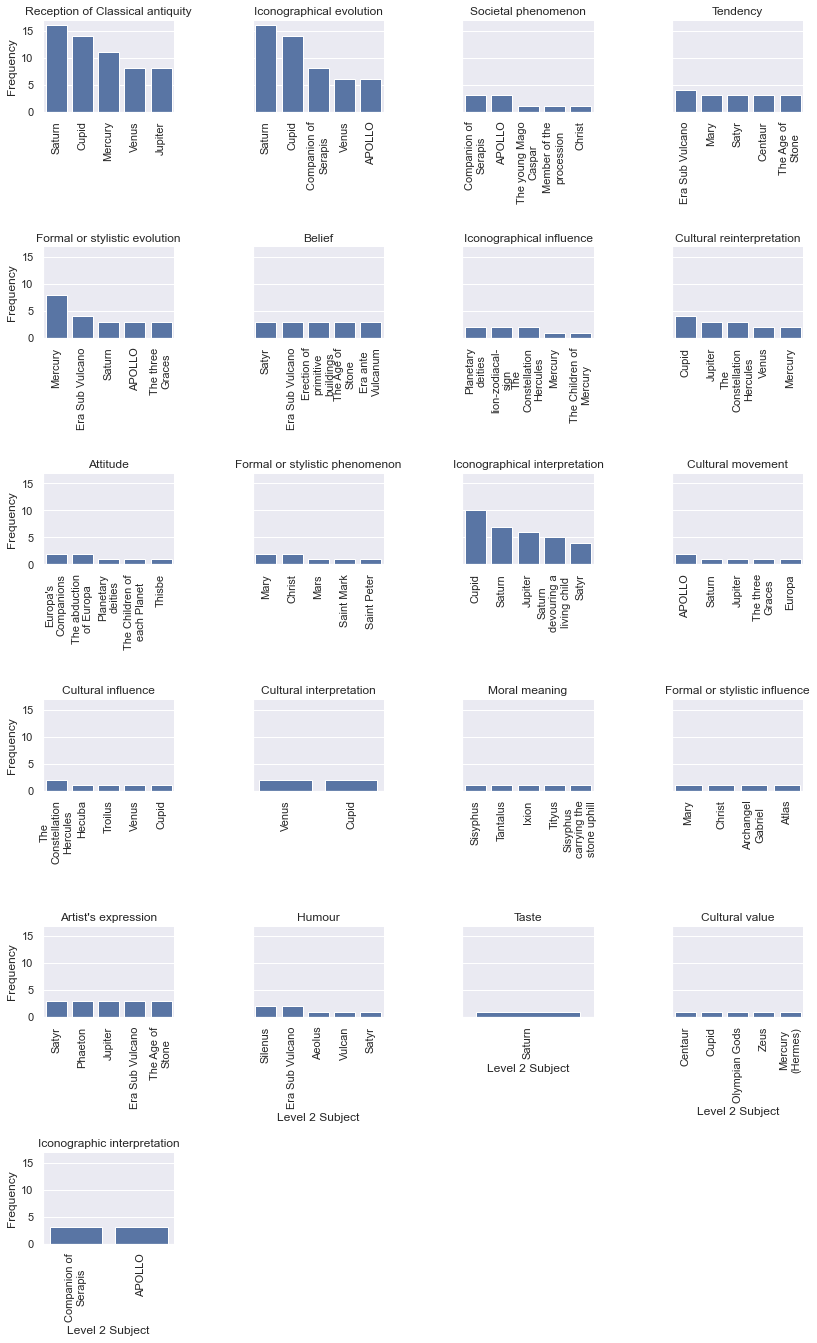

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

gr = sns.FacetGrid(dfSubjCf, col="Cultural Phenomenon", col_wrap=4, sharex=False)
gr.map_dataframe(sns.barplot, x="Level 2 Subject", y="Frequency")
gr.set_titles(col_template="{col_name}")
#plt.tight_layout()

for axes in gr.axes.flat: # we modify the x labels
    wrap_labels(axes, 15) # wrap the labels longer than 15 characters
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90) # rotate the labels

# gr.fig.tight_layout()
plt.subplots_adjust(hspace=1.5) # height space between graphs

In [122]:
#dfMeanings = meanings_subjects
meanings_subjects_without_count = []
for cf, value in meanings_subjects.items(): 
    name = cf[0]
    for s in value: 
       meanings_subjects_without_count.append([cf, s]) 
meanings_subjects_without_count

[['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/venus'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/jupiter'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/hercules'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/orpheus'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/christ'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/cerberus'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/pluto'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/proserpina'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/cerberus'],
 ['http://icondataset.org/reception-of-classical-antiquity',
  'http://icondataset.org/pluto'],
 ['http://icondataset

In [124]:
meanings_subjects_without_count

dfMeaning = pd.DataFrame(np.array(meanings_subjects_without_count),
                   columns=['Cultural Phenomenon', 'Level 2 Subject'])
